# MNIST TUTORIAL

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/georgia-tech-db/eva/blob/master/tutorials/01-mnist.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" /> Run on Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/georgia-tech-db/eva/blob/master/tutorials/01-mnist.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" /> View source on GitHub</a>
  </td>
  <td>
    <a target="_blank" href="https://raw.githubusercontent.com/georgia-tech-db/eva/master/tutorials/01-mnist.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" /> Download notebook</a>
  </td>
</table>

### Connect to EvaDB

In [1]:
%pip install evadb
import evadb
cursor = evadb.connect().cursor()


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


  0%|          | 0.00/49.7M [00:00<?, ?B/s]

 10%|█         | 5.16M/49.7M [00:00<00:00, 54.1MB/s]

 51%|█████     | 25.4M/49.7M [00:00<00:00, 147MB/s] 

 92%|█████████▏| 45.5M/49.7M [00:00<00:00, 176MB/s]

100%|██████████| 49.7M/49.7M [00:00<00:00, 163MB/s]

### Download the video and load it into EvaDB

In [2]:
# Getting MNIST as a video
!wget -nc https://www.dropbox.com/s/yxljxz6zxoqu54v/mnist.mp4

# Load the video into EvaDB
cursor.query("DROP TABLE IF EXISTS MNISTVid").df()
cursor.load("mnist.mp4", "MNISTVid", format="video").df()

--2023-06-08 00:26:44--  https://www.dropbox.com/s/yxljxz6zxoqu54v/mnist.mp4
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.18, 2620:100:601f:18::a27d:912
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.18|:443... connected.
HTTP request sent, awaiting response... 

302 Found
Location: /s/raw/yxljxz6zxoqu54v/mnist.mp4 [following]
--2023-06-08 00:26:44--  https://www.dropbox.com/s/raw/yxljxz6zxoqu54v/mnist.mp4
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 

302 Found
Location: https://uc5fda42285ff56ce303d62978e2.dl.dropboxusercontent.com/cd/0/inline/B9n0SG7cS-K_QBzJNtn2314CwmLzD2221GrgY5A8sNy6tm6u-sN5PNeda7hgVZ4pGvajdC8M0mzKXnN3tyErxDy7MfP3Wcl9fa8JNaNrY02ked1O6uN9nA14UWhTmacV313fxN1P-LkUXj_SDlW2xCuqWyCkw5SL3AS71ybmSpj5QA/file# [following]
--2023-06-08 00:26:44--  https://uc5fda42285ff56ce303d62978e2.dl.dropboxusercontent.com/cd/0/inline/B9n0SG7cS-K_QBzJNtn2314CwmLzD2221GrgY5A8sNy6tm6u-sN5PNeda7hgVZ4pGvajdC8M0mzKXnN3tyErxDy7MfP3Wcl9fa8JNaNrY02ked1O6uN9nA14UWhTmacV313fxN1P-LkUXj_SDlW2xCuqWyCkw5SL3AS71ybmSpj5QA/file
Resolving uc5fda42285ff56ce303d62978e2.dl.dropboxusercontent.com (uc5fda42285ff56ce303d62978e2.dl.dropboxusercontent.com)... 

162.125.9.15, 2620:100:601f:15::a27d:90f
Connecting to uc5fda42285ff56ce303d62978e2.dl.dropboxusercontent.com (uc5fda42285ff56ce303d62978e2.dl.dropboxusercontent.com)|162.125.9.15|:443... connected.


HTTP request sent, awaiting response... 

200 OK
Length: 62156 (61K) [video/mp4]
Saving to: ‘mnist.mp4’

mnist.mp4           100%[===================>]  60.70K  --.-KB/s    in 0s      

2023-06-08 00:26:45 (140 MB/s) - ‘mnist.mp4’ saved [62156/62156]



06-08-2023 00:26:45 WARNING[drop_object_executor:drop_object_executor.py:_handle_drop_table:0050] Table: MNISTVid does not exist


,0
0,Number of loaded VIDEO: 1


### Run the Image Classification Function over the video

In [3]:
# Connecting to the table with the loaded video
query = cursor.table("MNISTVid")

# Here, id refers to the frame id
# Each frame in the loaded MNIST video contains a digit
query = query.filter("id = 30 OR id = 50 OR id = 70 OR id = 0 OR id = 140")

# We are retrieving the frame "data" and 
# the output of the Image Classification function on the data 
# ("MnistImageClassifier(data).label")
query = query.select("data, MnistImageClassifier(data).label")

response = query.df()

2023-06-08 00:26:47,938	INFO worker.py:1625 -- Started a local Ray instance.


### Visualize output of query on the video

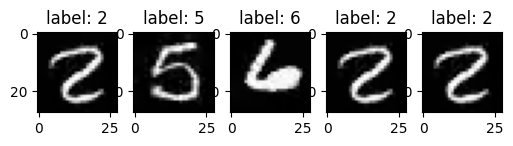

In [4]:
# !pip install matplotlib
import matplotlib.pyplot as plt
import numpy as np

# create figure (fig), and array of axes (ax)
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=[6,8])

for axi in ax.flat:
    idx = np.random.randint(len(response))
    img = response['mnistvid.data'].iloc[idx]
    label = response['mnistimageclassifier.label'].iloc[idx]
    axi.imshow(img)
    
    axi.set_title(f'label: {label}')

plt.show()